In [1]:
from pythtb import TBModel, Lattice
import matplotlib.pyplot as plt

In [2]:
# define lattice vectors
lat_vecs = [[1, 0], [0, 1]]
# define coordinates of orbitals
orb_vecs = [[0, 0], [1 / 2, 1 / 2]]

lat = Lattice(lat_vecs, orb_vecs, periodic_dirs=...)

In [3]:
my_model = TBModel(lat)

# set model parameters
delta = 1.1
t = 0.6

# set on-site energies
my_model.set_onsite([-delta, delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 1, 0, [0, 0])
my_model.set_hop(t, 1, 0, [1, 0])
my_model.set_hop(t, 1, 0, [0, 1])
my_model.set_hop(t, 1, 0, [1, 1])

print(my_model)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 2
k-space dimension           = 2
periodic directions         = [0, 1]
spinful                     = False
number of spin components   = 1
number of electronic states = 2
number of orbitals          = 2

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000,  0.000]
  # 1 ===> [ 0.000,  1.000]
Volume of unit cell (Cartesian) = 1.000 [A^d]

Reciprocal lattice vectors (Cartesian):
  # 0 ===> [ 6.283,  0.000]
  # 1 ===> [ 0.000,  6.283]
Volume of reciprocal unit cell = 39.478 [A^-d]

Orbital vectors (Cartesian):
  # 0 ===> [ 0.000,  0.000]
  # 1 ===> [ 0.500,  0.500]

Orbital vectors (fractional):
  # 0 ===> [ 0.000,  0.000]
  # 1 ===> [ 0.500,  0.500]
----------------------------------------
Site energies:
  < 0 | H | 0 > = -1.100 
  < 1 | H | 1 > =  1.100 
Hoppings:
  < 1 | H | 0  + [ 0.0 ,  0.0 ] > = 0.6000+0.0000j
  < 1 | H | 0  + [ 1.0 ,  

(<Figure size 800x800 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

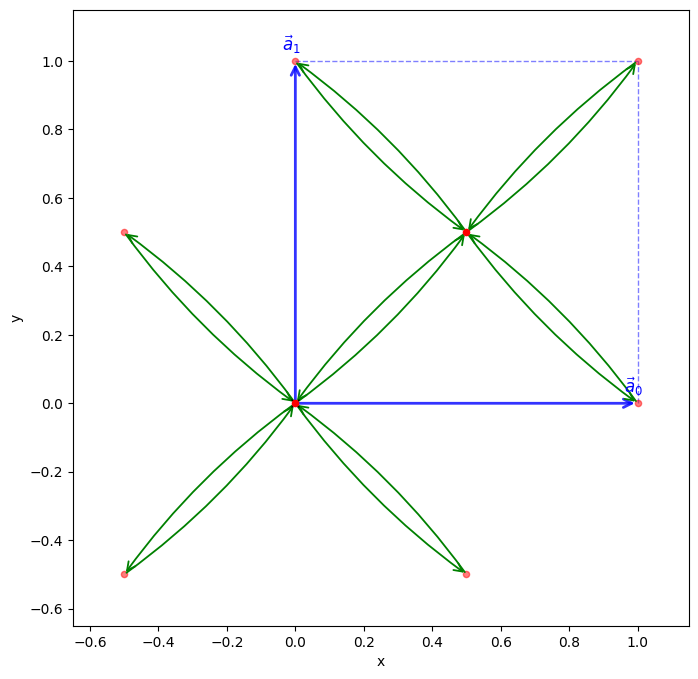

In [4]:
my_model.visualize()

In [5]:
path = [[0.0, 0.0], [0.0, 0.5], [0.5, 0.5], [0.0, 0.0]]
label = (r"$\Gamma $", r"$X$", r"$M$", r"$\Gamma $")
(k_vec, k_dist, k_node) = my_model.k_path(path, 301, report=True)

----- k_path report -----
Real-space lattice vectors:
 [[1. 0.]
 [0. 1.]]
K-space metric tensor:
 [[39.47842  0.     ]
 [ 0.      39.47842]]
Nodes (reduced coords):
 [[0.  0. ]
 [0.  0.5]
 [0.5 0.5]
 [0.  0. ]]
Reciprocal-space vectors:
 [[1. 0.]
 [0. 1.]]
Nodes (Cartesian coords):
 [[0.  0. ]
 [0.  0.5]
 [0.5 0.5]
 [0.  0. ]]
Segments:
  Node 0 [0. 0.] to Node 1 [0.  0.5]: distance = 3.14159
  Node 1 [0.  0.5] to Node 2 [0.5 0.5]: distance = 3.14159
  Node 2 [0.5 0.5] to Node 3 [0. 0.]: distance = 4.44288
Node distances (cumulative): [ 0.       3.14159  6.28319 10.72607]
Node indices in path: [  0  88 176 300]
-------------------------


In [6]:
evals = my_model.solve_ham(k_vec)

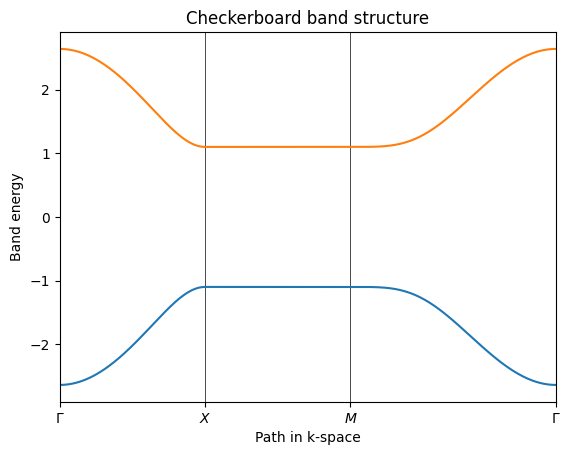

In [7]:
fig, ax = plt.subplots()

ax.set_xlim(k_node[0], k_node[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(label)
for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5, color="k")

ax.plot(k_dist, evals)

ax.set_title("Checkerboard band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")
plt.show()